<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

/home/influx/anaconda3/envs/MLCourse/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load and Prepare Data

In [2]:
churn = pd.read_csv("Churn.csv")

In [3]:
churn.shape

(10000, 14)

In [4]:
type(churn)

pandas.core.frame.DataFrame

## EDA

In [5]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
churn.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [7]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
churn.shape

(10000, 11)

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
churn.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
41,465,France,Female,51,8,122522.32,1,0,0,181297.65,1
5925,706,Germany,Female,39,8,112889.91,1,0,1,6723.66,0
5936,588,Spain,Female,22,9,67178.19,1,1,1,163534.75,1
6189,714,Germany,Male,39,3,149887.49,2,1,0,63846.36,0
9693,617,Germany,Female,51,10,167273.71,1,0,0,93439.75,1
4493,825,Spain,Female,32,1,0.00,2,1,1,42935.15,0
4506,597,Spain,Female,66,3,0.00,1,1,1,70532.53,0
2536,691,France,Male,58,3,0.00,1,0,1,194930.30,1
1577,687,Spain,Female,21,8,0.00,2,1,1,154767.34,0
8559,677,Germany,Female,39,0,111213.64,2,1,1,147578.26,0


In [11]:
churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
churn.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
for col in churn.columns:
    print(churn.value_counts(col))
    print("------------------")

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
441      1
440      1
423      1
424      1
358      1
Length: 460, dtype: int64
------------------
Geography
France     5014
Germany    2509
Spain      2477
dtype: int64
------------------
Gender
Male      5457
Female    4543
dtype: int64
------------------
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
83      1
85      1
88      1
Length: 70, dtype: int64
------------------
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
dtype: int64
------------------
Balance
0.00         3617
130170.82       2
105473.74       2
133776.86       1
132187.73       1
             ... 
107135.04       1
107106.33       1
107104.50       1
107073.27       1
250898.09       1
Length: 6382, dtype: int64
------------------
NumOfProducts
1    5084
2    4590
3     266
4      60
dtype: int64
------------------
HasCrCa

In [15]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
eda = churn.copy()

In [17]:
eda['HasCrCard']=eda['HasCrCard'].map({1:"Yes",0:"No"})

In [18]:
eda['IsActiveMember']=eda['IsActiveMember'].map({1:"Yes",0:"No"})

In [19]:
eda['Exited']=eda['Exited'].map({1:"Yes",0:"No"})

In [20]:
eda.groupby(by="Gender")[["CreditScore", "Age", "Balance", "EstimatedSalary"]].mean().reset_index()

,Gender,CreditScore,Age,Balance,EstimatedSalary
0,Female,650.831389,39.238389,75659.369139,100601.541382
1,Male,650.276892,38.658237,77173.974506,99664.576931


In [21]:
eda.groupby(by="Geography")[["CreditScore", "Age", "Balance", "EstimatedSalary"]].mean().reset_index()

,Geography,CreditScore,Age,Balance,EstimatedSalary
0,France,649.668329,38.511767,62092.636516,99899.180814
1,Germany,651.453567,39.771622,119730.116134,101113.435102
2,Spain,651.333872,38.890997,61818.147763,99440.572281


In [22]:
eda.groupby(by=["Geography", "Gender"])[["CreditScore", "Age", "Balance", "EstimatedSalary"]].mean().reset_index()

,Geography,Gender,CreditScore,Age,Balance,EstimatedSalary
0,France,Female,649.185759,38.773994,60322.670159,99564.252755
1,France,Male,650.064657,38.296404,63546.284875,100174.252495
2,Germany,Female,653.093881,40.154233,119145.966471,102446.424124
3,Germany,Male,649.966565,39.424772,120259.668222,99905.033959
4,Spain,Female,651.769513,39.199265,59862.092534,100734.107475
5,Spain,Male,650.992075,38.649135,63352.833746,98425.687680


In [23]:
eda.groupby(by=["HasCrCard", "IsActiveMember"])[["CreditScore", "Age", "Balance", "EstimatedSalary"]].mean().reset_index()

,HasCrCard,IsActiveMember,CreditScore,Age,Balance,EstimatedSalary
0,No,No,649.638829,37.997859,77825.424525,100806.588594
1,No,Yes,652.893782,40.123057,78007.318381,101126.664922
2,Yes,No,647.296984,37.997970,76853.588646,100751.200948
3,Yes,Yes,652.951483,39.649570,74962.849983,98736.528051


In [24]:
eda.groupby(by="Exited")[["CreditScore", "Age", "Balance", "EstimatedSalary"]].mean().reset_index()

,Exited,CreditScore,Age,Balance,EstimatedSalary
0,No,651.853196,37.408389,72745.296779,99738.391772
1,Yes,645.351497,44.837997,91108.539337,101465.677531


In [25]:
eda.groupby(by=["Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"])[["CreditScore", "Age", "Balance", "EstimatedSalary"]].mean().reset_index()

,Geography,Gender,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Balance,EstimatedSalary
0,France,Female,No,No,No,646.486056,35.075697,61482.300359,99101.900120
1,France,Female,No,No,Yes,637.500000,45.375000,67829.120500,111553.749375
2,France,Female,No,Yes,No,650.597270,38.334471,62901.802184,100267.616928
3,France,Female,No,Yes,Yes,632.779661,46.338983,59131.657458,107839.795424
4,France,Female,Yes,No,No,646.932143,35.042857,57450.195089,100181.610000
5,France,Female,Yes,No,Yes,646.125000,45.432692,67533.098173,102326.327356
6,France,Female,Yes,Yes,No,654.865136,38.959828,56223.511822,96258.412712
7,France,Female,Yes,Yes,Yes,650.132743,44.592920,72614.096991,98205.730619
8,France,Male,No,No,No,644.940063,35.577287,63230.771073,100634.264416
9,France,Male,No,No,Yes,634.482759,45.689655,89976.515345,103211.880517


In [26]:
pd.crosstab(eda["Geography"], eda["Gender"], margins=True)

Gender,Female,Male,All
Geography,,,
France,2261,2753,5014
Germany,1193,1316,2509
Spain,1089,1388,2477
All,4543,5457,10000


In [27]:
pd.crosstab(eda["IsActiveMember"], eda["Exited"], margins=True)

Exited,No,Yes,All
IsActiveMember,,,
No,3547,1302,4849
Yes,4416,735,5151
All,7963,2037,10000


In [28]:
pd.crosstab(eda["Gender"], eda["HasCrCard"], margins=True)

HasCrCard,No,Yes,All
Gender,,,
Female,1351,3192,4543
Male,1594,3863,5457
All,2945,7055,10000


In [29]:
pd.crosstab(eda["Geography"], eda["HasCrCard"], margins=True)

HasCrCard,No,Yes,All
Geography,,,
France,1471,3543,5014
Germany,718,1791,2509
Spain,756,1721,2477
All,2945,7055,10000


In [30]:
pd.crosstab([eda["Geography"],eda["Gender"]] , eda["HasCrCard"], margins=True)

HasCrCard           No   Yes    All
Geography Gender                   
France    Female   683  1578   2261
          Male     788  1965   2753
Germany   Female   350   843   1193
          Male     368   948   1316
Spain     Female   318   771   1089
          Male     438   950   1388
All               2945  7055  10000

In [31]:
pd.crosstab([eda["Geography"],eda["Gender"]] , eda["Exited"])

Exited              No  Yes
Geography Gender           
France    Female  1801  460
          Male    2403  350
Germany   Female   745  448
          Male     950  366
Spain     Female   858  231
          Male    1206  182

In [32]:
pd.crosstab([eda["IsActiveMember"],eda["Gender"]] , eda["Exited"], margins=True, normalize=True)*100

Exited                    No    Yes     All
IsActiveMember Gender                      
No             Female  15.34   7.25   22.59
               Male    20.13   5.77   25.90
Yes            Female  18.70   4.14   22.84
               Male    25.46   3.21   28.67
All                    79.63  20.37  100.00

In [33]:
Active = eda[eda["IsActiveMember"]=="Yes"]
inActive = eda[eda["IsActiveMember"]=="No"]

In [34]:
Active

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
6,822,France,Male,50,7,0.00,2,Yes,Yes,10062.80,No
8,501,France,Male,44,4,142051.07,2,No,Yes,74940.50,No
...,...,...,...,...,...,...,...,...,...,...,...
9986,673,Germany,Male,47,1,183579.54,2,No,Yes,34047.54,No
9987,606,Spain,Male,30,8,180307.73,2,Yes,Yes,1914.41,No
9989,841,Spain,Male,28,4,0.00,2,Yes,Yes,179436.60,No
9996,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No


In [35]:
inActive

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
5,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes
7,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes
10,528,France,Male,31,6,102016.72,2,No,No,80181.12,No
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,Yes,No,29179.52,No
9994,800,France,Female,29,2,0.00,2,No,No,167773.55,No
9995,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No
9998,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,Yes


In [36]:
churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [37]:
Active.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000
mean,652.934188,39.791497,4.933217,75875.422145,1.535624,99452.965894
std,95.580356,11.691969,2.898377,62257.859389,0.571357,57461.026613
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,587.000000,32.000000,2.000000,0.000000,1.000000,50768.785000
50%,655.000000,37.000000,5.000000,96166.880000,2.000000,99505.750000
75%,719.000000,45.000000,7.000000,127033.240000,2.000000,148648.760000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199953.330000


In [38]:
inActive.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000
mean,647.973603,37.997938,5.097340,77134.376863,1.524438,100767.203854
std,97.725193,8.943580,2.883465,62545.195018,0.592401,57561.190241
min,350.000000,18.000000,0.000000,0.000000,1.000000,91.750000
25%,581.000000,32.000000,3.000000,0.000000,1.000000,51553.430000
50%,650.000000,37.000000,5.000000,98263.460000,1.000000,100686.110000
75%,716.000000,43.000000,8.000000,128270.560000,2.000000,149913.840000
max,850.000000,84.000000,10.000000,222267.630000,4.000000,199992.480000


## Data Preprocessing

In [39]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [40]:
churn.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Strorytelling - Visualization

In [42]:
vs = eda.copy()

In [43]:
vs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No
9996,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No
9997,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes
9998,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,Yes


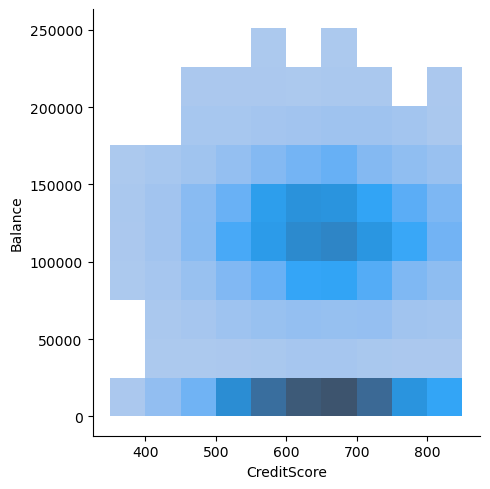

In [44]:
sns.displot(vs, x="CreditScore", y="Balance", bins=10)

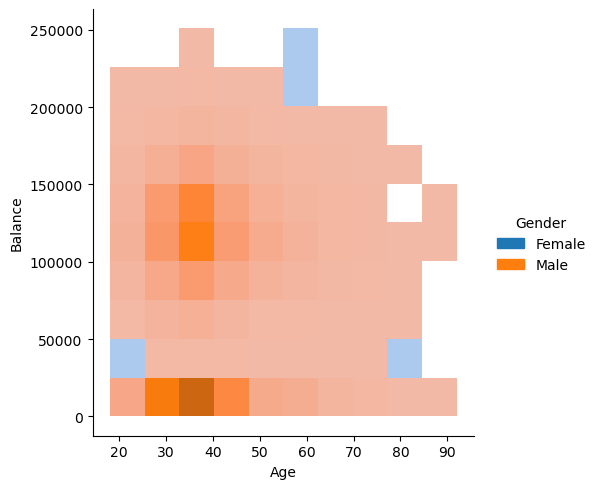

In [45]:
sns.displot(vs, x="Age", y="Balance", bins=10, hue="Gender")

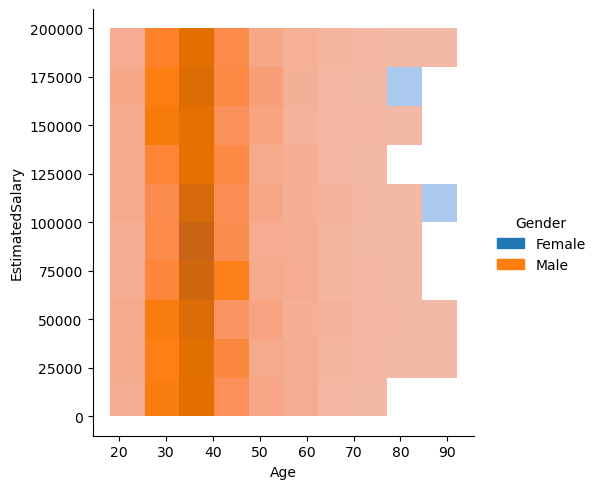

In [46]:
sns.displot(vs, x="Age", y="EstimatedSalary", bins=10, hue="Gender")

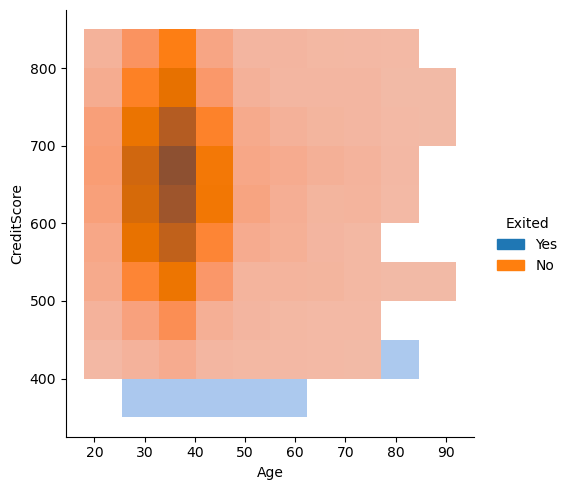

In [47]:
sns.displot(vs, x="Age", y="CreditScore", bins=10, hue="Exited")

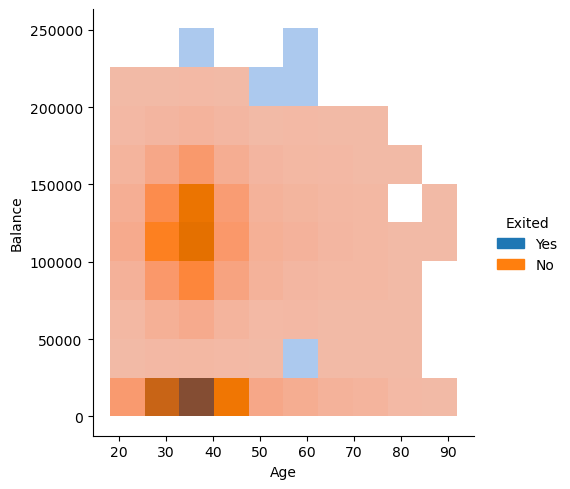

In [48]:
sns.displot(vs, x="Age", y="Balance", bins=10, hue="Exited")

In [49]:
vs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No
9996,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No
9997,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes
9998,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,Yes


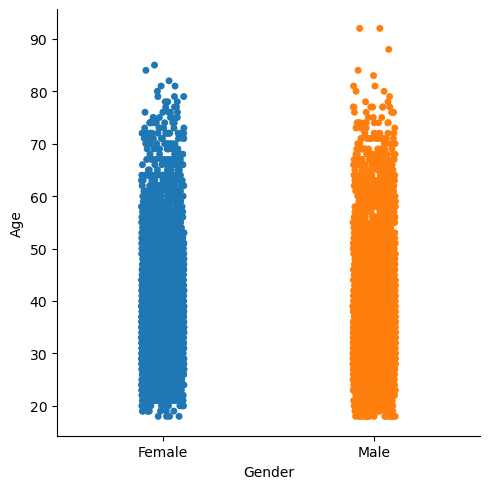

In [50]:
sns.catplot(data=vs, x="Gender", y="Age")

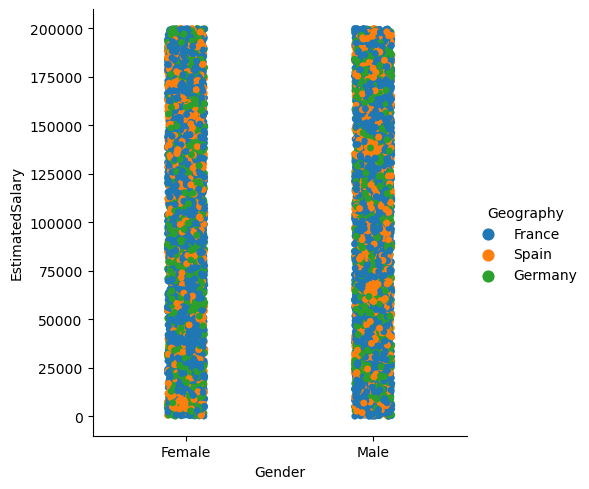

In [51]:
sns.catplot(data=vs, x="Gender", y="EstimatedSalary", hue="Geography")

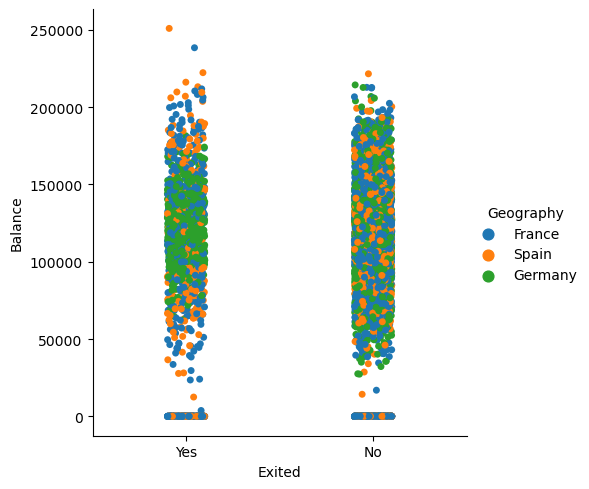

In [52]:
sns.catplot(data=vs, x="Exited", y="Balance", hue="Geography")

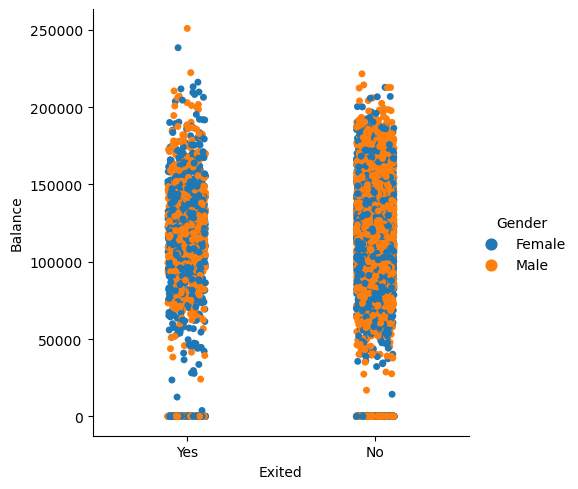

In [53]:
sns.catplot(data=vs, x="Exited", y="Balance", hue="Gender")

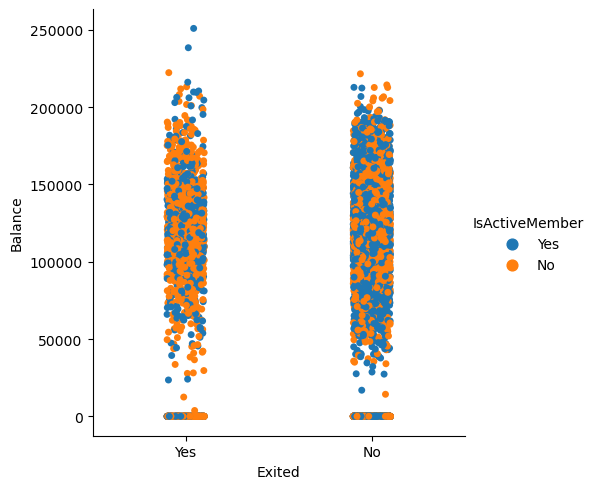

In [54]:
sns.catplot(data=vs, x="Exited", y="Balance", hue="IsActiveMember")

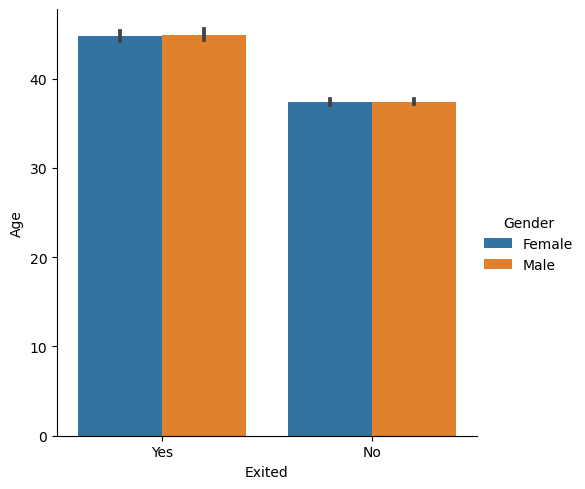

In [55]:
sns.catplot(data=vs, x="Exited", y="Age",hue="Gender", kind="bar")

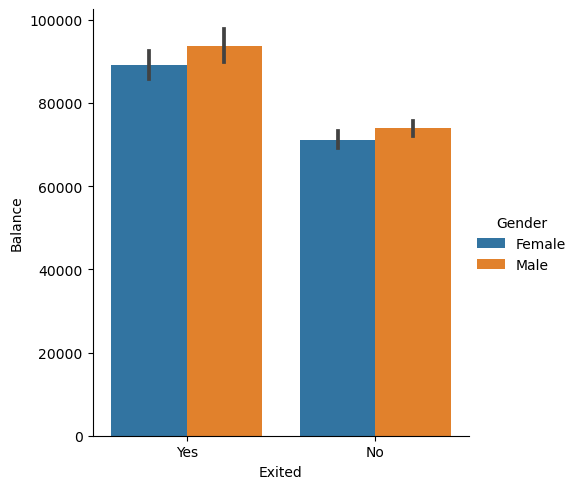

In [56]:
sns.catplot(data=vs, x="Exited", y="Balance",hue="Gender", kind="bar")

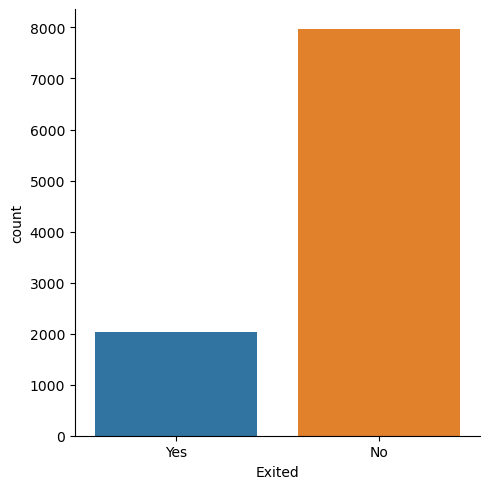

In [57]:
sns.catplot(kind="count", data=vs, x="Exited")

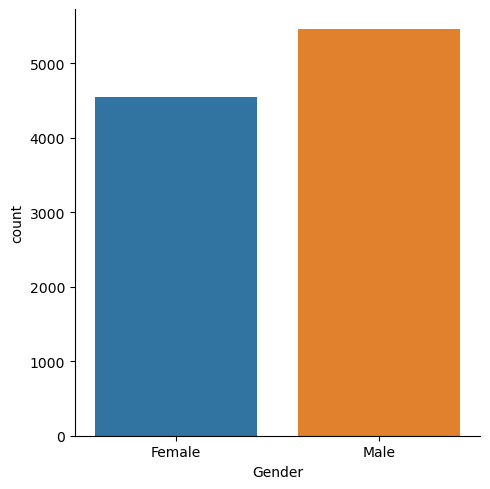

In [58]:
sns.catplot(kind="count", data=vs, x="Gender")

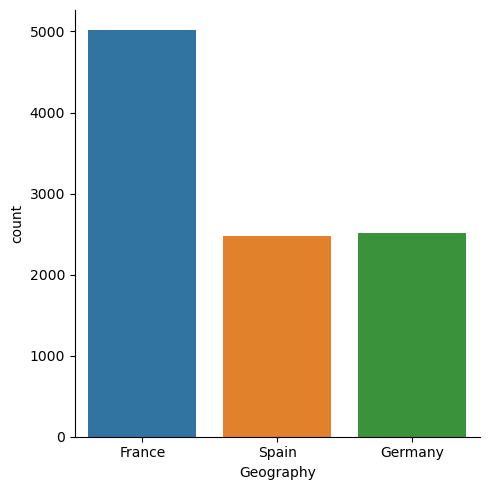

In [59]:
sns.catplot(kind="count", data=vs, x="Geography")

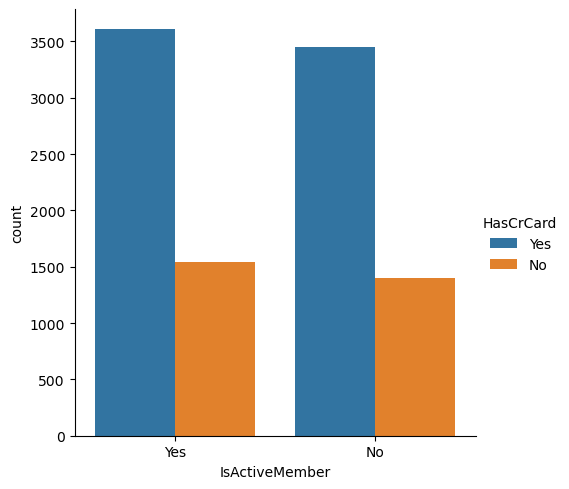

In [60]:
sns.catplot(kind="count", data=vs, x="IsActiveMember", hue="HasCrCard")

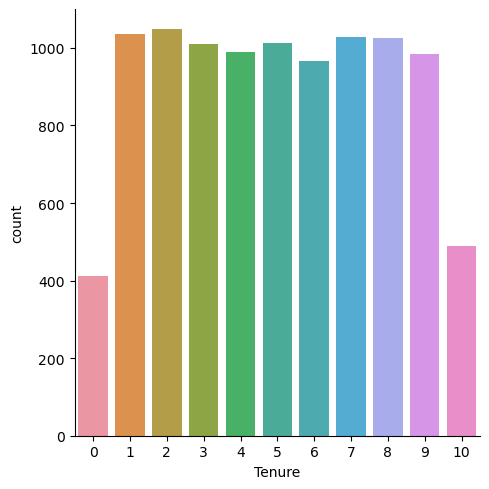

In [61]:
sns.catplot(kind="count", data=vs, x="Tenure")

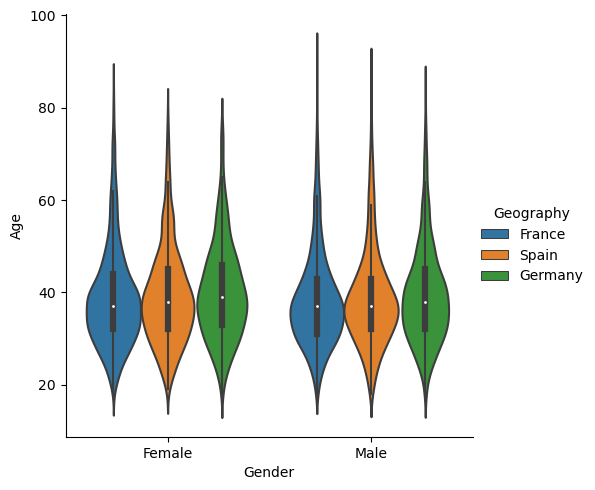

In [62]:
sns.catplot(kind="violin", data=vs, x="Gender", y="Age", hue="Geography")

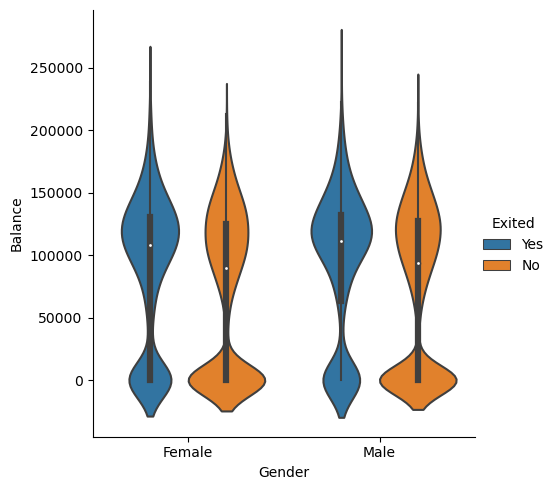

In [63]:
sns.catplot(kind="violin", data=vs, x="Gender", y="Balance", hue="Exited")

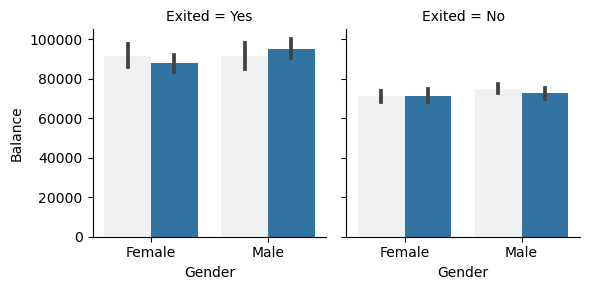

In [64]:
g = sns.FacetGrid(vs, col="Exited")
g.map_dataframe(sns.barplot, x="Gender", y="Balance", hue="IsActiveMember")

## Prepare Data for Machine learning

In [65]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [66]:
Geography = churn["Geography"].values
le = LabelEncoder()
Geography = le.fit_transform(Geography)
churn["Geography"] = Geography

In [67]:
Gender = churn["Gender"].values
le = LabelEncoder()
Gender = le.fit_transform(Gender)
churn["Gender"] = Gender

In [68]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:>

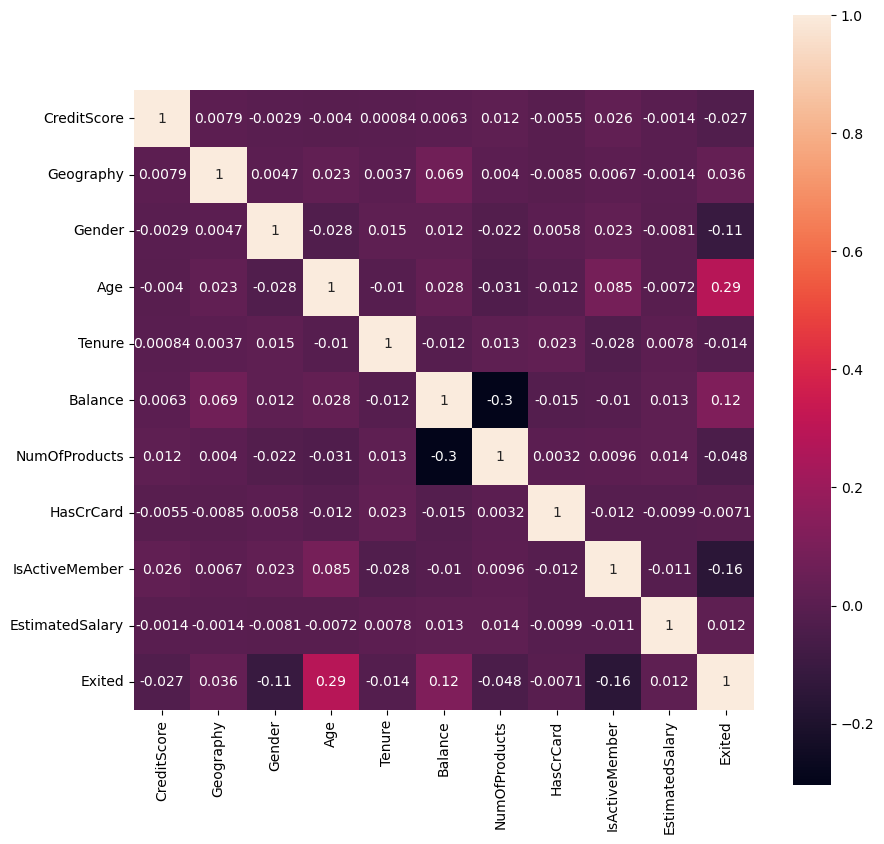

In [69]:
my_correlation = churn.corr()
plt.figure(figsize=(10,10))
sns.heatmap(my_correlation,annot=True,  annot_kws={'size':10}, cbar=True, square= True)

In [70]:
sc = StandardScaler()
fs = churn[["CreditScore", "Age", "Balance", "EstimatedSalary"]].values
fs=fs.reshape(-1,4)
fs[:, :] = sc.fit_transform(fs[:, :])

In [71]:
fs

array([[-0.32622142,  0.29351742, -1.22584767,  0.02188649],
       [-0.44003595,  0.19816383,  0.11735002,  0.21653375],
       [-1.53679418,  0.29351742,  1.33305335,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412, -1.22584767, -1.00864308],
       [ 1.25683526,  0.29351742, -0.02260751, -0.12523071],
       [ 1.46377078, -1.04143285,  0.85996499, -1.07636976]])

In [72]:
churn["CreditScore"] = fs[: ,0]

In [73]:
churn["Age"] = fs[: ,1]

In [74]:
churn["Balance"] = fs[: ,2]

In [75]:
churn["EstimatedSalary"] = fs[: ,3]

In [76]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,5,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,0,1,-0.373958,10,-0.306379,1,1,1,0.027988,0
9997,0.604988,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643,1
9998,1.256835,1,1,0.293517,3,-0.022608,2,1,0,-0.125231,1


In [77]:
churn.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

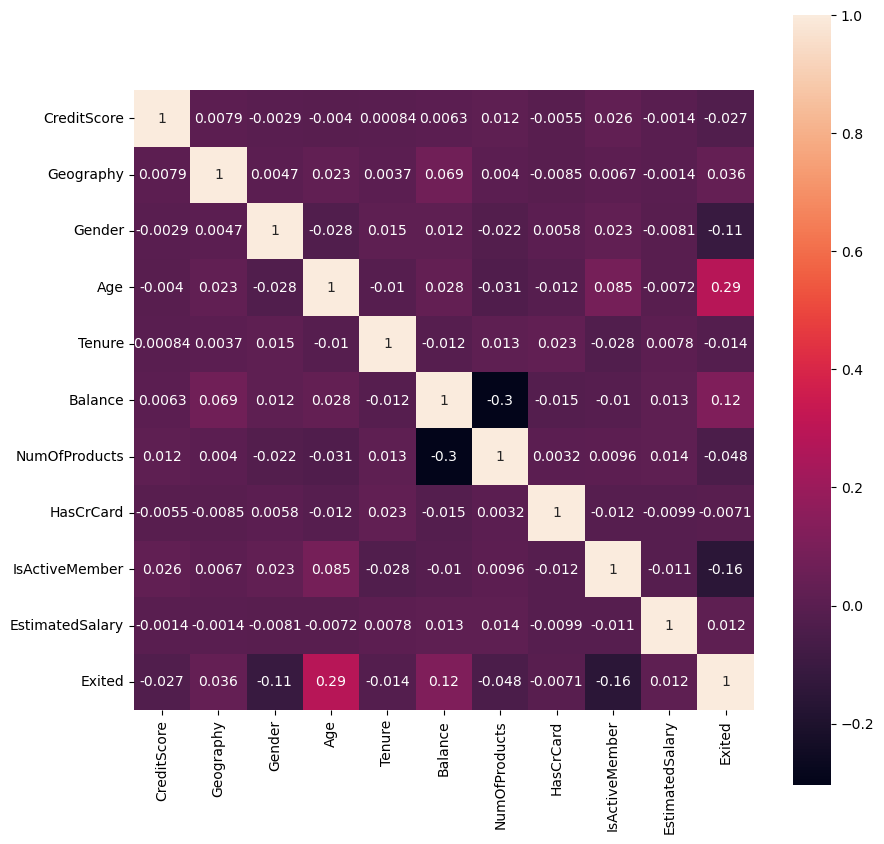

In [78]:
my_correlation = churn.corr()
plt.figure(figsize=(10,10))
sns.heatmap(my_correlation,annot=True,  annot_kws={'size':10}, cbar=True, square= True)

## Train your model

In [79]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,5,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,0,1,-0.373958,10,-0.306379,1,1,1,0.027988,0
9997,0.604988,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643,1
9998,1.256835,1,1,0.293517,3,-0.022608,2,1,0,-0.125231,1


In [80]:
Y = churn["Exited"]
X = churn.drop(columns="Exited")

In [81]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [82]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,5,-1.225848,2,1,0,-0.066419
9996,-1.391939,0,1,-0.373958,10,-0.306379,1,1,1,0.027988
9997,0.604988,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643
9998,1.256835,1,1,0.293517,3,-0.022608,2,1,0,-0.125231


In [83]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.25, random_state=20)

In [84]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2294,-0.615931,0,1,-0.564665,9,0.885976,1,1,0,0.325032
2808,0.035916,0,1,0.293517,7,0.365053,1,1,1,-0.564835
6480,0.294585,0,0,-1.422847,6,0.616449,2,0,1,0.620405
9202,-1.267778,0,1,-0.755372,9,0.712833,1,1,0,-1.646233
3111,-0.284834,1,1,0.293517,1,1.167520,2,1,0,0.012937
...,...,...,...,...,...,...,...,...,...,...
3915,0.367013,1,1,0.388871,2,0.936146,1,1,1,-0.039007
9620,-0.926334,2,1,-0.183251,4,0.400428,1,0,1,-0.195663
7068,0.501521,1,0,1.437761,3,0.553311,1,1,1,0.970577
7391,-2.281762,0,1,-0.755372,5,-1.225848,1,1,0,-0.077122


In [85]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9957,-0.181367,0,1,-1.327494,1,-1.225848,1,1,0,0.008846
1687,2.063884,2,1,-0.183251,4,0.973148,1,1,1,-1.238525
2116,0.522214,0,1,0.484225,7,-1.225848,2,1,0,-1.333118
231,-0.419342,0,1,0.102810,0,-1.225848,2,1,0,-0.658307
2780,1.318916,2,1,0.102810,8,0.445642,2,1,1,0.302862
...,...,...,...,...,...,...,...,...,...,...
8514,0.066956,2,1,-0.946079,7,0.118651,1,1,0,0.921085
5190,0.874005,2,1,-0.278604,5,-1.225848,2,1,0,0.088022
6766,-0.129633,1,0,-0.564665,5,0.847029,1,1,1,-0.756509
347,-0.077899,1,1,1.914528,3,1.504072,1,1,1,-1.181034


In [86]:
y_train

2294    0
2808    0
6480    0
9202    0
3111    0
       ..
3915    0
9620    0
7068    1
7391    0
4367    1
Name: Exited, Length: 7500, dtype: int64

In [87]:
y_test

9957    0
1687    0
2116    0
231     0
2780    0
       ..
8514    0
5190    0
6766    1
347     0
6961    0
Name: Exited, Length: 2500, dtype: int64

In [88]:
rfc = RandomForestClassifier(criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

## Test the model and show the metrics

In [89]:
y_pred = rfc.predict(X_test)

In [90]:
metrics.confusion_matrix(y_test, y_pred)

array([[1955,   67],
       [ 263,  215]])

In [91]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2022
           1       0.76      0.45      0.57       478

    accuracy                           0.87      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.86      0.87      0.85      2500



In [92]:
print('The RandomForestClassifier Score is: ', (rfc.score(X, Y)))
print('The Accuracy of RandomForestClassifier is: ', (metrics.accuracy_score(y_test, y_pred)))
print('F1-Score of RandomForestClassifier is: ', (metrics.f1_score(y_test, y_pred)))
print('Recall-Score of RandomForestClassifier is: ', (metrics.recall_score(y_test, y_pred)))
print('Precision-Score of RandomForestClassifier is: ', (metrics.precision_score(y_test, y_pred)))

The RandomForestClassifier Score is:  0.967
The Accuracy of RandomForestClassifier is:  0.868
F1-Score of RandomForestClassifier is:  0.5657894736842106
Recall-Score of RandomForestClassifier is:  0.4497907949790795
Precision-Score of RandomForestClassifier is:  0.7624113475177305


In [93]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=X.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

feature_importance

,rfc
HasCrCard,0.019882
Gender,0.020263
Geography,0.037037
IsActiveMember,0.037258
Tenure,0.086023
NumOfProducts,0.120097
CreditScore,0.147130
Balance,0.147680
EstimatedSalary,0.151222
Age,0.233408


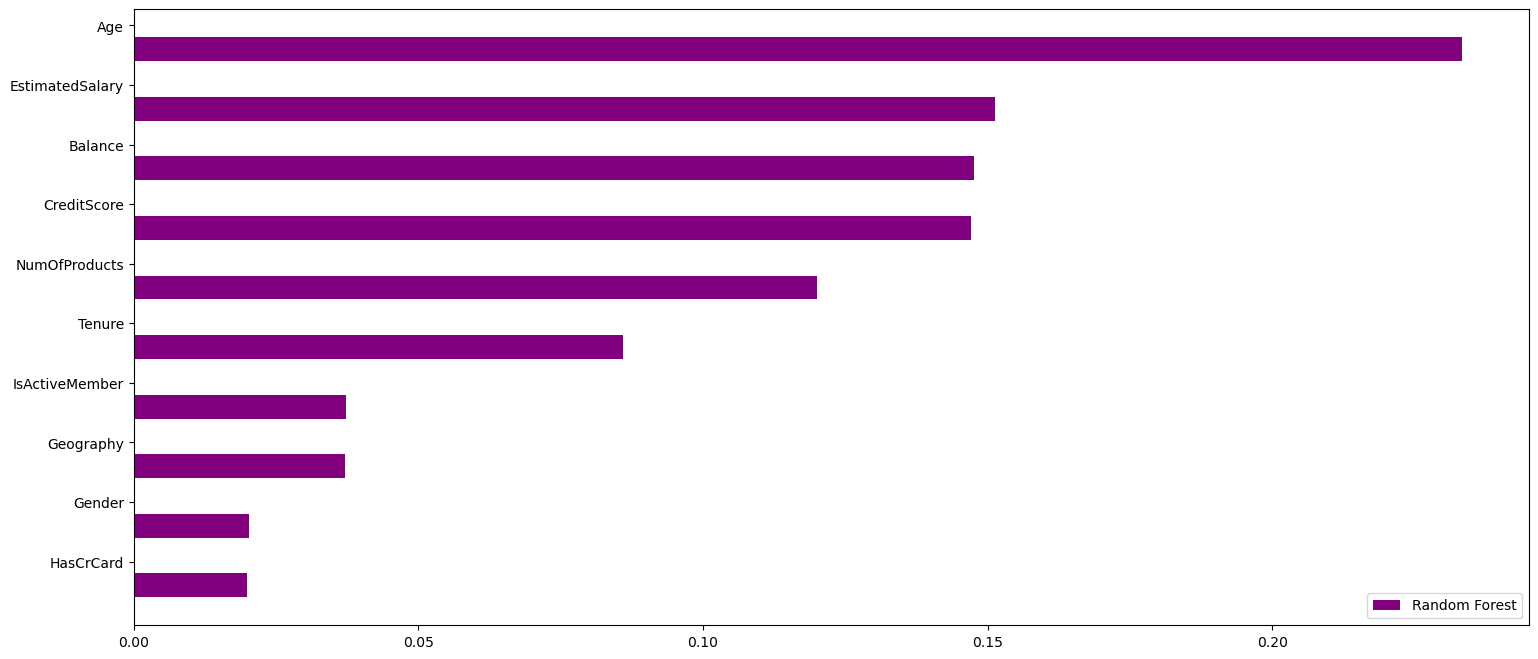

In [94]:
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

## Save your final model

## Send us the Result (Maktabkhoone)